In [88]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
#training dataset
hotel_train = pd.read_csv('train.csv',encoding='latin-1')
hotel_train.head()


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
#testing dataset
hotel_test=pd.read_csv('test.csv',encoding='latin-1')
hotel_test.head()


,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [6]:
hotel_train.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)


hotel_train.rename(columns={'Is_Response':'label','Description':'review'},inplace=True)

In [7]:
hotel_test.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)


hotel_test.rename(columns={'Description':'Reviews'},inplace=True)

In [8]:
hotel_train.head()

,review,label
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [9]:
hotel_test.head()

,Reviews
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


In [10]:
print ('Shape of the train data= >',hotel_train.shape)
print ('Shape of the test data= >',hotel_test.shape)



Shape of the train data= > (38932, 2)
Shape of the test data= > (29404, 1)


In [11]:
print ('happy ratio = ', round(len(hotel_train[hotel_train['label']=='happy']) / len(hotel_train.label),2)*100,'%')
print ('not happy ratio  = ', round(len(hotel_train[hotel_train['label']=='not happy']) / len(hotel_train.label),2)*100,'%')

happy ratio =  68.0 %
not happy ratio  =  32.0 %


In [12]:
hotel_train['length'] = hotel_train.review.str.len()
hotel_train.head(5)

,review,label,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [13]:
hotel_test['length'] = hotel_test.Reviews.str.len()
hotel_test.head(5)

,Reviews,length
0,Looking for a motel in close proximity to TV t...,676
1,Walking distance to Madison Square Garden and ...,588
2,Visited Seattle on business. Spent - nights in...,863
3,This hotel location is excellent and the rooms...,778
4,This hotel is awesome I love the service Antho...,255


In [14]:
#providing values to target variable
hotel_train['label'].replace({'happy':0,'not happy':1},inplace=True)


In [15]:
hotel_train.head()

,review,label,length
0,The room was kind of clean but had a VERY stro...,1,248
1,I stayed at the Crown Plaza April -- - April -...,1,1077
2,I booked this hotel through Hotwire at the low...,1,1327
3,Stayed here with husband and sons on the way t...,0,502
4,My girlfriends and I stayed here to celebrate ...,1,1613


# Data cleaning for train data

In [16]:
hotel_train['review'] = hotel_train['review'].str.lower()

In [17]:
hotel_train['review'] = hotel_train['review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
hotel_train['review'] = hotel_train['review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
hotel_train['review'] = hotel_train['review'].str.replace(r'^\s+|\s+?$', '')

In [18]:
import string
import nltk
from nltk.corpus import  stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','i','and','on','us','would'])
punct =string.punctuation


hotel_train['review'] = hotel_train['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
hotel_train['review'] = hotel_train['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_train['review'] = hotel_train['review'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_train['review'] = hotel_train['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))

In [19]:
hotel_train['clean_length'] = hotel_train.review.str.len()

In [20]:
print ('Origian Length :', hotel_train.length.sum())
print ('Clean Length :', hotel_train.clean_length.sum())

Origian Length : 33737295
Clean Length : 20272644


In [21]:
hotel_train.shape

(38932, 4)

In [22]:
hotel_test.shape

(29404, 2)

In [23]:
from textblob import TextBlob
hotel_train['polarity']=hotel_train['review'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [24]:
hotel_train.head()

,review,label,length,clean_length,polarity
0,room kind clean strong smell dogs generally av...,1,248,134,0.366964
1,stayed crown plaza april april staff friendly ...,1,1077,637,0.086634
2,booked hotel hotwire lowest price could find g...,1,1327,768,0.142882
3,stayed husband sons way alaska cruise loved ho...,0,502,333,0.696000
4,girlfriends stayed celebrate th birthdays plan...,1,1613,941,0.128258


In [25]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(hotel_train.iloc[hotel_train['polarity'].sort_values(ascending=False)[:5].index]['review']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 westin wonderfully restored grande dame hotel beds linens excellent pay internet
Review 2:
 best food dc trip hotel best room service ever
Review 3:
 four seasons hotel best austin husband especially love entertainment lobby lounge friday nights murphey inlaws drinks service perfect
Review 4:
 wonderful stay son wedding nd floor staff excellant
Review 5:
 stayed business trip impressed set location rooms service


In [26]:
print("5 Random Reviews with lowest Polarity:")
for index,review in enumerate(hotel_train.iloc[hotel_train['polarity'].sort_values(ascending=True)[:5].index]['review']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with lowest Polarity:
Review 1:
 please stay hotel worst experience ever threw
Review 2:
 never stay go work motel since owner want rip employees customer worst ethics people world
Review 3:
 traveller beware hotel got lots style glitz staff cannot trusted purse stolen room either maid bellman took hotel days send security take statement insurance carrier denying claim damages lost items terrible experience
Review 4:
 make terrible mistake hotel dump pictures rooms website look like hotel hotel something horror movie charged room even stay could stay conditions canceled reservation
Review 5:
 rooms reeked like mildew bathroom disgusting hallway rooms smelled like urine


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer()
counts = co.fit_transform(hotel_train.review)
df1=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(5)
df1

,0
hotel,72396
room,62530
stay,26572
great,25776
staff,24562


In [28]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [29]:
hotel_train['review1'] =hotel_train['review'].apply(lambda x: lemmatize_text(x) )

In [30]:
hotel_train['review1'].head()

0    [room, kind, clean, strong, smell, dog, genera...
1    [stayed, crown, plaza, april, april, staff, fr...
2    [booked, hotel, hotwire, lowest, price, could,...
3    [stayed, husband, son, way, alaska, cruise, lo...
4    [girlfriend, stayed, celebrate, th, birthday, ...
Name: review1, dtype: object

In [31]:
hotel_train

,review,label,length,clean_length,polarity,review1
0,room kind clean strong smell dogs generally av...,1,248,134,0.366964,"[room, kind, clean, strong, smell, dog, genera..."
1,stayed crown plaza april april staff friendly ...,1,1077,637,0.086634,"[stayed, crown, plaza, april, april, staff, fr..."
2,booked hotel hotwire lowest price could find g...,1,1327,768,0.142882,"[booked, hotel, hotwire, lowest, price, could,..."
3,stayed husband sons way alaska cruise loved ho...,0,502,333,0.696000,"[stayed, husband, son, way, alaska, cruise, lo..."
4,girlfriends stayed celebrate th birthdays plan...,1,1613,941,0.128258,"[girlfriend, stayed, celebrate, th, birthday, ..."
...,...,...,...,...,...,...
38927,arrived late night walked check area completel...,0,769,426,0.143056,"[arrived, late, night, walked, check, area, co..."
38928,positive impression location public parking op...,1,533,345,0.326722,"[positive, impression, location, public, parki..."
38929,traveling friends shopping show location great...,1,1065,596,0.169643,"[traveling, friend, shopping, show, location, ..."
38930,experience ok paid extra view pool got view pa...,1,519,306,0.350000,"[experience, ok, paid, extra, view, pool, got,..."


In [32]:
word_list_new = []
for i in hotel_train['review1']:
    word_list_new.append(i)
flat_list = []
for sublist in word_list_new:
    for item in sublist:
        flat_list.append(item)    

In [33]:
from collections import Counter
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in flat_list:
            emotion_list.append(emotion)
print("People emotions from the text \n", emotion_list, '\n \n')

w = Counter(emotion_list)
print("Count of each emotion \n", w)



People emotions from the text 
 [' cheated', ' cheated', ' singled out', ' loved', ' loved', ' attracted', ' sad', ' fearful', ' fearful', ' happy', ' angry', ' happy', ' angry', ' attracted', ' bored', ' angry', ' singled out', ' esteemed', ' fearful', ' lustful', ' attached', ' attracted', ' independent', ' fearful', ' embarrassed', ' attached', ' cheated', ' surprise', ' angry', ' happy', ' powerless', ' sad', ' angry', ' fearless', ' bored', ' fearless', ' happy', ' happy', ' safe', ' adequate', ' attached', ' powerless', ' singled out', ' fearful', ' fearless', ' belittled', ' attracted', ' hated', ' cheated', ' happy', ' sad', ' happy', ' attached', ' fearful', ' independent', ' happy', ' average', ' adequate', ' apathetic', ' adequate', ' attracted', ' adequate', ' surprise', ' attached', ' cheated', ' obsessed', ' powerless', ' happy', ' entitled', ' fearful', ' attracted', ' sad', ' hated', ' angry', ' sad', ' attracted', ' fearless', ' sad', ' attracted', ' powerless', ' sad'

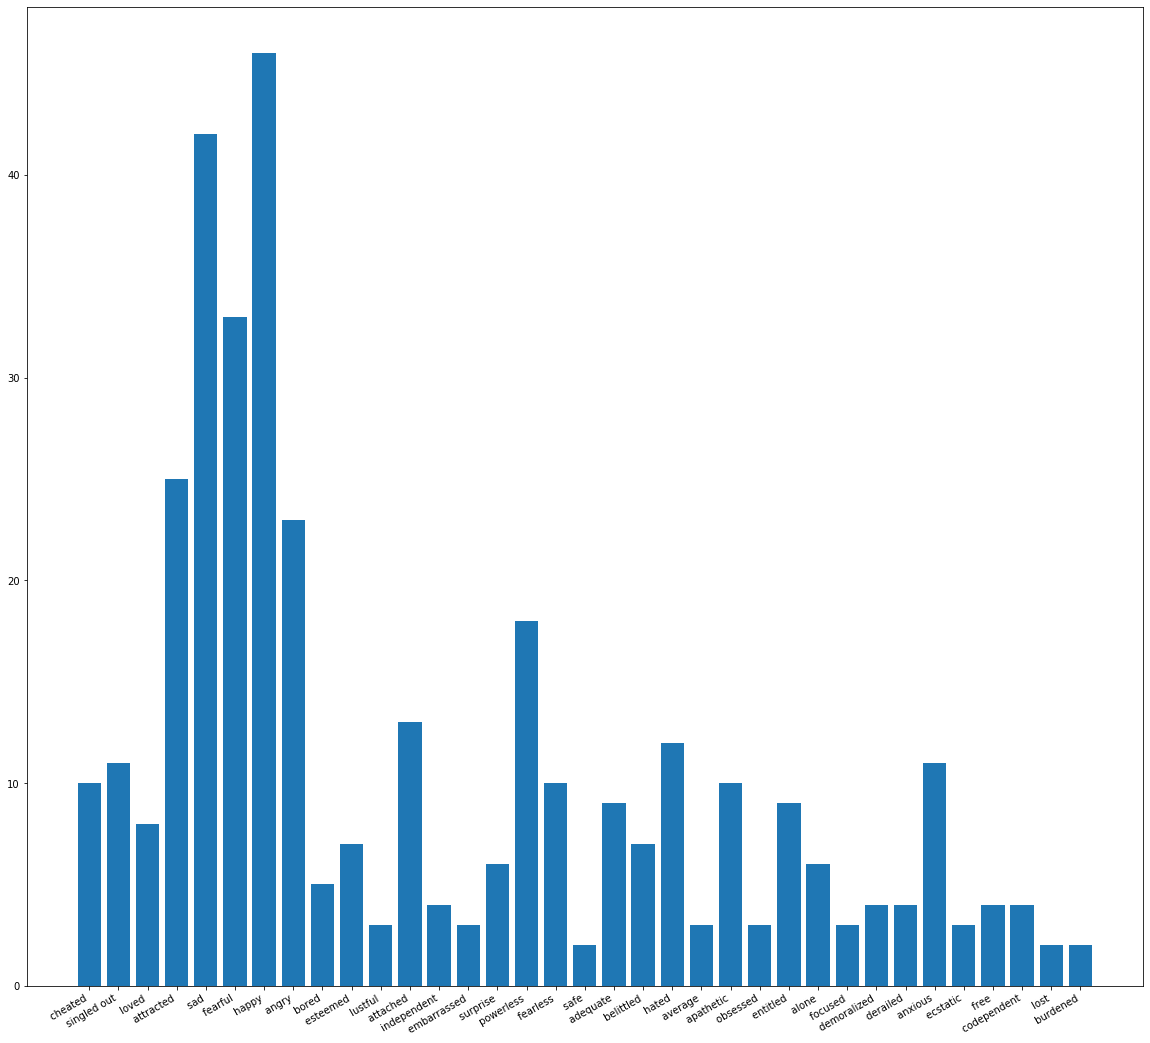

In [34]:
fig, ax1 = plt.subplots(figsize=(20,20))
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

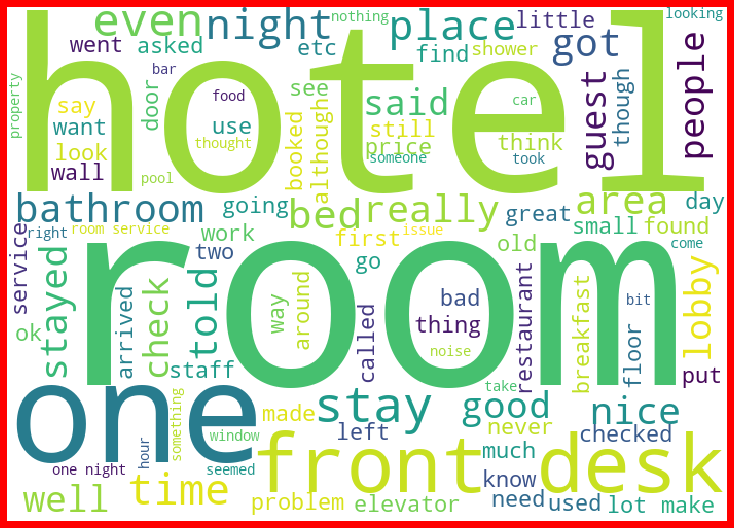

In [35]:
from wordcloud import WordCloud

reviews = hotel_train['review'][hotel_train['label']==1]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


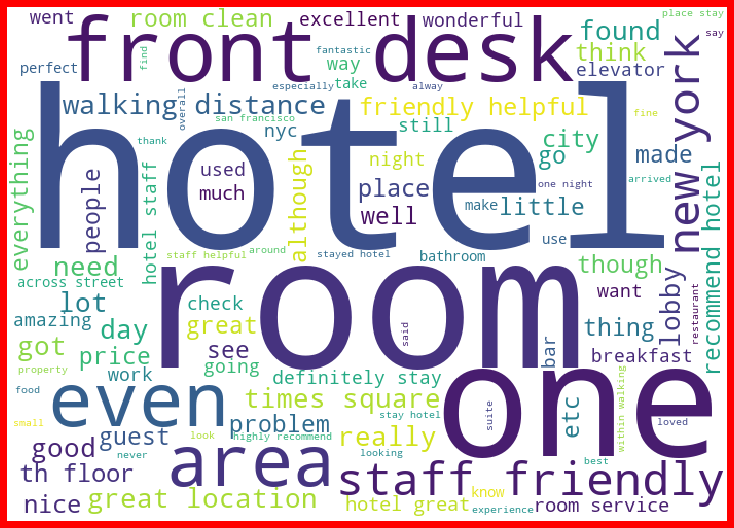

In [36]:
reviews = hotel_train['review'][hotel_train['label']==0]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# DATA CLEANING FOR TEST DATA

In [37]:
hotel_test['Reviews'] = hotel_test['Reviews'].str.lower()

In [38]:
hotel_test['Reviews'] = hotel_test['Reviews'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
hotel_test['Reviews'] = hotel_test['Reviews'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
hotel_test['Reviews'] = hotel_test['Reviews'].str.replace(r'^\s+|\s+?$', '')

In [39]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','i','and','on','us','would'])
punct =string.punctuation


hotel_test['Reviews'] = hotel_test['Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
hotel_test['Reviews'] = hotel_test['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_test['Reviews'] = hotel_test['Reviews'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_test['Reviews'] = hotel_test['Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))

In [40]:
hotel_test['clean_length'] = hotel_train.review.str.len()

In [41]:
print ('Origian Length :', hotel_test.length.sum())
print ('Clean Length   :', hotel_test.clean_length.sum())

Origian Length : 25559671
Clean Length   : 15273790


In [42]:
from textblob import TextBlob
hotel_test['polarity']=hotel_test['Reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [43]:
print("5 Random Reviews with Highest Polarity:")
for index,Reviews in enumerate(hotel_test.iloc[hotel_test['polarity'].sort_values(ascending=False)[:5].index]['Reviews']):
  print('Reviews {}:\n'.format(index+1),Reviews)

5 Random Reviews with Highest Polarity:
Reviews 1:
 perfect spot time square everything walking distance rooms suites lots room hotel starbucks lobby else could ask
Reviews 2:
 excellent customer services staff front desk shuttle svs
Reviews 3:
 excellent accomidations rooms luxerious felf pampered
Reviews 4:
 wonderful stay one thing like see exhaust fans bathrooms help remove smells moisture bathroom
Reviews 5:
 best hotel world travel dog bar lounge best city may sit dog doormen marvelous


In [44]:
print("5 Random Reviews with lowest Polarity:")
for index,Reviews in enumerate(hotel_test.iloc[hotel_test['polarity'].sort_values(ascending=True)[:5].index]['Reviews']):
    print('Reviews {}:\n'.format(index+1),Reviews)

5 Random Reviews with lowest Polarity:
Reviews 1:
 park car hotel charge day park car ability outrageous
Reviews 2:
 stay suffered severe cigarette smoke inhalation room cockroach salad disgusting
Reviews 3:
 hotel rooms horrible soundproofing could hear everything streetcars trains ambulances people talking street well guests talking opening closing doors hallway worst shuttle service riverwalk stay holiday inn street instead
Reviews 4:
 noisy talking highway traffic room odor c didnt work correctly hairs restroom floor bed looked like somebody already slept disgusting
Reviews 5:
 checked learn demolition project happening lower floors nasty picket line bunch jerks screaming bullhorns checked morning management told grin bear staff acted like refugees chain gang get clue


In [45]:
co = CountVectorizer()
count = co.fit_transform(hotel_test.Reviews)
dft=pd.DataFrame(count.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(5)
dft

,0
hotel,55234
room,47359
stay,20088
great,19557
staff,18517


In [46]:
hotel_test['Reviews1'] =hotel_test['Reviews'].apply(lambda x: lemmatize_text(x) )

In [47]:
hotel_test.head(5)

,Reviews,length,clean_length,polarity,Reviews1
0,looking motel close proximity tv taping dr phi...,676,134,0.019048,"[looking, motel, close, proximity, tv, taping,..."
1,walking distance madison square garden penn su...,588,637,0.204968,"[walking, distance, madison, square, garden, p..."
2,visited seattle business spent nights vintage ...,863,768,0.286979,"[visited, seattle, business, spent, night, vin..."
3,hotel location excellent rooms clean suite one...,778,333,0.104592,"[hotel, location, excellent, room, clean, suit..."
4,hotel awesome love service anthony really grea...,255,941,0.825000,"[hotel, awesome, love, service, anthony, reall..."


In [48]:
word_list_new1 = []
for i in hotel_test['Reviews1']:
    word_list_new1.append(i)
flat_list1 = []
for sublist in word_list_new1:
    for item in sublist:
        flat_list1.append(item)   

In [49]:
from collections import Counter
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in flat_list1:
            emotion_list.append(emotion)
print("People emotions from the text \n", emotion_list, '\n \n')

v = Counter(emotion_list)
print("Count of each emotion \n", v)


People emotions from the text 
 [' cheated', ' loved', ' loved', ' attracted', ' fearful', ' attracted', ' sad', ' fearful', ' happy', ' angry', ' happy', ' angry', ' attracted', ' bored', ' angry', ' singled out', ' esteemed', ' fearful', ' lustful', ' attached', ' attracted', ' fearful', ' embarrassed', ' attached', ' cheated', ' surprise', ' angry', ' happy', ' powerless', ' sad', ' angry', ' fearless', ' bored', ' fearless', ' happy', ' happy', ' safe', ' adequate', ' attached', ' powerless', ' singled out', ' fearful', ' fearless', ' belittled', ' attracted', ' hated', ' cheated', ' happy', ' happy', ' attached', ' fearful', ' independent', ' cheated', ' happy', ' average', ' adequate', ' adequate', ' attracted', ' adequate', ' surprise', ' attached', ' cheated', ' obsessed', ' powerless', ' happy', ' entitled', ' attracted', ' angry', ' sad', ' attracted', ' fearless', ' sad', ' attracted', ' powerless', ' belittled', ' sad', ' hated', ' loved', ' alone', ' focused', ' belittled'

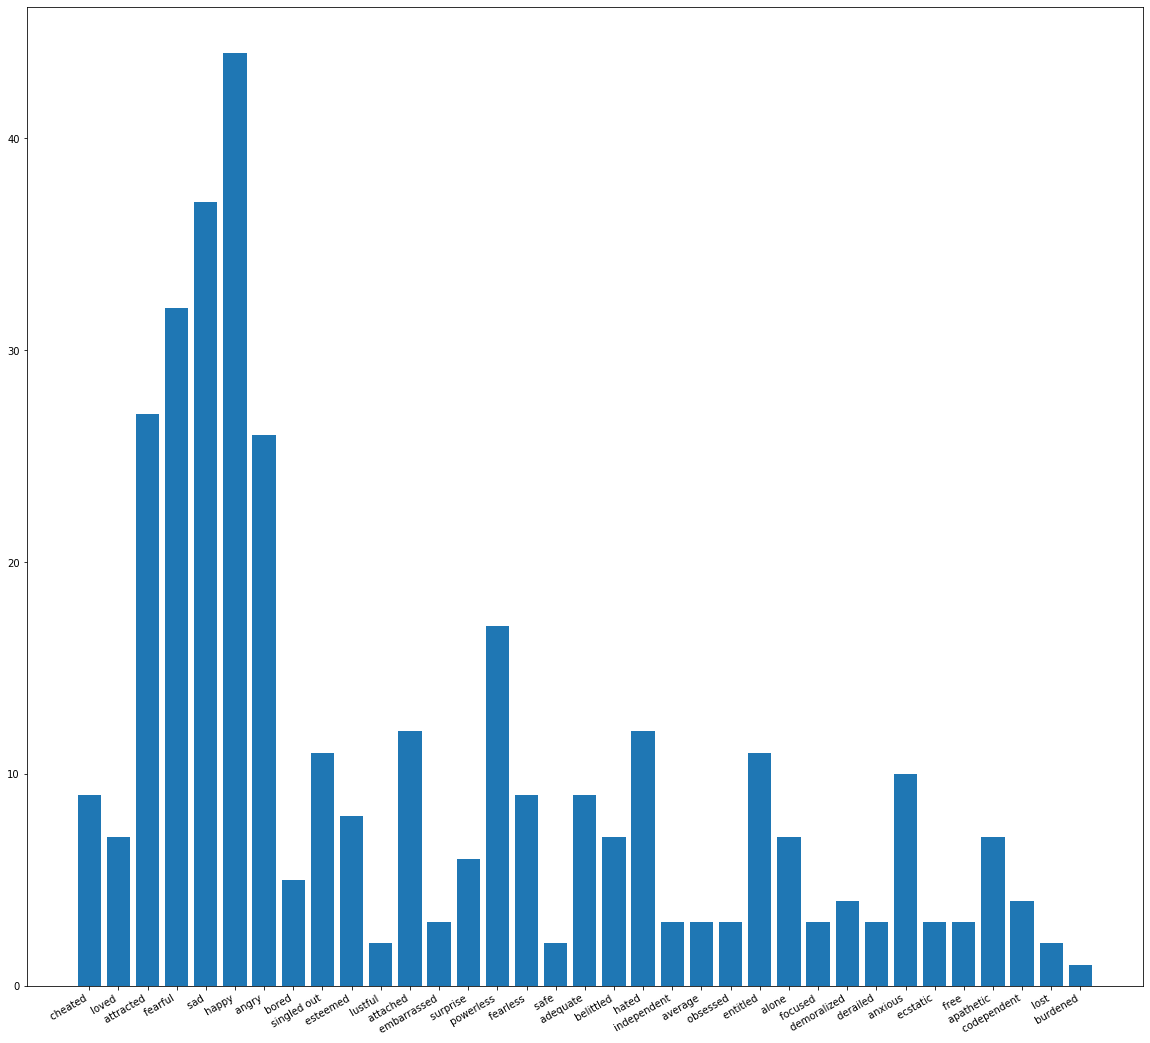

In [50]:
fig, ax1 = plt.subplots(figsize=(20,20))
ax1.bar(v.keys(), v.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

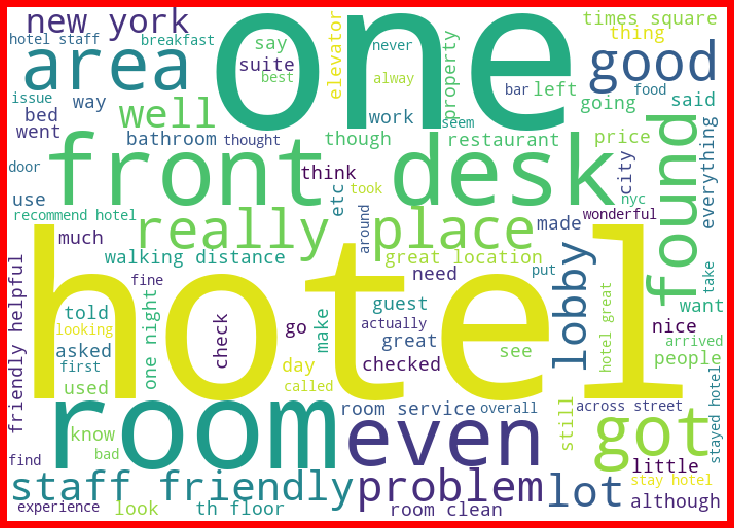

In [51]:
reviewsN = hotel_test['Reviews']

reviewsN_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(reviewsN))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviewsN_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#MOST OCCURED WORDS ARE HOTEL ROOM ALSO BAD PROBLEM ISSUE  ARE OCCURING

In [52]:
#By seeing words by plotting i found that test data have more postive words such as happy\
#whereas in train data i can see that more number of negative words are found
#By comparing word clouds of train and test data "good" word is found in test and not in train\
#which means that people are happy with our hotel as commpared to the general reviews of other hotels
#

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [54]:
#FLATLIST1 = str(flat_list1)
mylist = 'i am happy that i am working from home'
print (sia.polarity_scores(mylist))

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}


# MODEL BUILDING

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()# i am building model on the basis of tfidf and not on count vectorizer because tfidf vectorizer 
            #give more weightage to important words but not give weightage to frequently occuring words eg hotel will come very frequently\
            #but its not important as we are looking at hotel review

naive = MultinomialNB()

x = tf_vec.fit_transform(hotel_train['review'])


y = hotel_train['label']

In [56]:
print(x.shape)
print(y.shape)

(38932, 46720)
(38932,)


# NAIVE BAIS

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
naive.fit(x_train,y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))


(29199, 46720)
(9733, 46720)
(29199,)
(9733,)
Final score = >  0.8070481865817323


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88      6637
           1       0.96      0.41      0.58      3096

    accuracy                           0.81      9733
   macro avg       0.87      0.70      0.73      9733
weighted avg       0.84      0.81      0.78      9733



In [59]:
y_pred_prob=naive.predict_proba(x_test)[:,1]

y_pred_prob




array([0.08038151, 0.02244744, 0.01229547, ..., 0.01209984, 0.36635016,
       0.13860912])

In [62]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

auc_score=roc_auc_score(y_test,naive.predict(x_test))


In [63]:
auc_score

0.7015305804629048

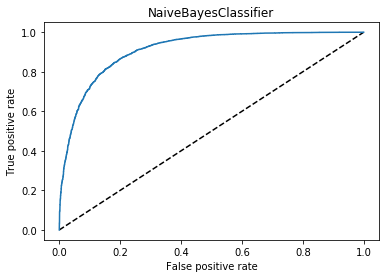

In [64]:
y_pred_prob=naive.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='NaiveBayesClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NaiveBayesClassifier')
plt.show()

# LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)


LogisticRegression()

In [66]:
pred=lg.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.8812288092057947


In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6637
           1       0.86      0.75      0.80      3096

    accuracy                           0.88      9733
   macro avg       0.87      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733



In [68]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [69]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [70]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.8471697357504461

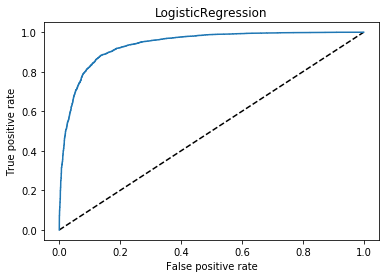

In [71]:
y_pred_prob=lg.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

# DESICION TREE

In [72]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct=dct.predict(x_test)
print(classification_report(y_test,preddct))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6637
           1       0.60      0.59      0.60      3096

    accuracy                           0.74      9733
   macro avg       0.70      0.70      0.70      9733
weighted avg       0.74      0.74      0.74      9733



In [73]:
y_pred_prob=dct.predict_proba(x_test)[:,1]

In [74]:

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [75]:
auc_score=roc_auc_score(y_test,dct.predict(x_test))
auc_score

0.7033652466654908

# RANDONM FOREST

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test) 
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6637
           1       0.92      0.52      0.66      3096

    accuracy                           0.83      9733
   macro avg       0.86      0.75      0.78      9733
weighted avg       0.85      0.83      0.82      9733



In [77]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [78]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [79]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.74975696111261

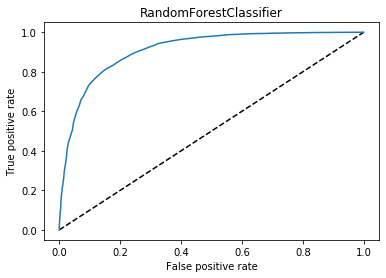

In [80]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

Out of all the models the best model is logistic regression so i will select the logistic regression as the best model 

In [89]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [90]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
#predmnb=mnb.predict(x_test)
pred=lg.predict(x_test)
evaluate_preds(y_test,pred)

Acc: 88.12%
Precision: 0.86
Recall: 0.75
F1 score: 0.80


{'accuracy': 0.88, 'precision': 0.86, 'recall': 0.75, 'f1': 0.8}

In [83]:
# Printing predicted values 
test=pd.DataFrame(data=y_test,)
test['Predicted values']=pred
test
# On the lest side values are those fields which are taken by machine for test...

,label,Predicted values
22284,0,0
5325,0,0
323,0,0
3318,0,0
38287,1,1
...,...,...
4343,0,0
29821,1,1
11821,0,0
3116,0,0


In [84]:
import joblib
joblib.dump(lg,'Project_1 Sentiment Analysis.pkl')

['Project_1 Sentiment Analysis.pkl']

In [91]:
#read the file using joblib
lg_from_joblib=joblib.load('Project_1 Sentiment Analysis.pkl')
joblib_y_preds = lg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 88.12%
Precision: 0.86
Recall: 0.75
F1 score: 0.80


{'accuracy': 0.88, 'precision': 0.86, 'recall': 0.75, 'f1': 0.8}